# <center>ECE9309B Machine Learning: Final Exam</center>
<center>Tareq Tayeh</center>

##### Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.io as sio
import math
import pandas as pd
import seaborn as sns
import glob
import tracemalloc

from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from time import time

### Question 1) Indicate the ratio of the normal and anomaly examples in the dataset. Make a bar chart to visualize the ratios [7 points].

##### Reading data set and storing it as a dataframe

In [2]:
ip_df = pd.read_csv('Abnormal_IP_detection.csv', index_col=None, header=0) #header = 0 reads first row in excel sheet as column header, (header = None) does not

##### View data set contents

In [3]:
ip_df

,requests,request_interval,request_popularity,bytes,delivery_time,hit_rate,nodes,contents,label
0,27,537.329852,1.000000,14.447266,17.444444,0.925926,4,18,0
1,5,0.031200,1.000000,126.134570,29.200000,1.000000,1,5,0
2,60,386.569217,1.000000,17.346110,89.450000,1.000000,1,59,0
3,42,254.592976,1.000000,18.032971,33.476190,0.976190,3,24,0
4,2,15201.067000,1.000000,10.734375,3.500000,1.000000,1,1,0
...,...,...,...,...,...,...,...,...,...
50751,3,1828.726667,1.000000,0.000000,10.000000,1.000000,3,1,0
50752,143,192.876539,0.993007,15.903662,35.202797,0.979021,5,61,0
50753,18,799.248222,1.000000,29.667209,277.611111,0.888889,1,9,0
50754,7,1.209429,1.000000,34.100725,12.142857,1.000000,1,7,0


##### View the value counts for the label columns. 0 indicates normal, while 1 indicates abnormal

In [4]:
ip_df['label'].value_counts()

0    49073
1     1683
Name: label, dtype: int64

In [5]:
ip_df['label'].value_counts(normalize=True)

0    0.966841
1    0.033159
Name: label, dtype: float64

It can be seen that there are 49,073 normal examples and 1,683 anomaly examples. This constitutes to a 0.967:0.033 normal:anomaly ratio.

##### Plot bar chart to visualize the ratios

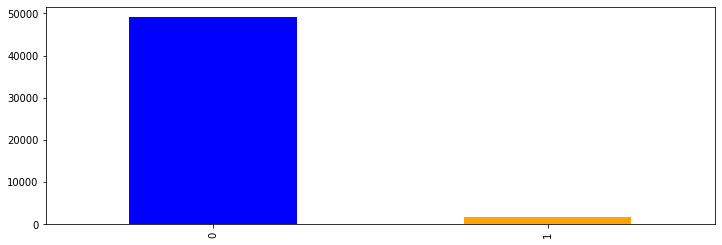

In [6]:
plt.figure(figsize=(12, 4))
ip_df['label'].value_counts().plot(kind='bar', color=["blue", "orange"])

### Question 2) Plot the probability density function (PDF) of each feature, and make your observations of the pdf of each feature (i.e., normal distribution, left-skewed distribution, right-skewed distribution, ...) [7 points].

I will be using the `distplot` function from the `Seaborn` package. I will utilize it to show a default plot with a kernel density estimate (KDE) and histogram with bin size determined automatically with a reference rule. KDE is a non-parametric way to estimate the PDF of a random variable, where a Histogram displays the distribution of data values along the real number line.  Afterwards, KDE will be normalized and plotted to get a clearer visualization.

Normal objects will occur in regions of high probability while anomaly objects will occur in the regions of low probability.

##### Function that takes in a feature and plot its KDE and histogram

In [133]:
def plot_feature(feature):
    plt.figure(figsize=(12, 4))
    sns.distplot(feature)

##### Feature #1: Requests

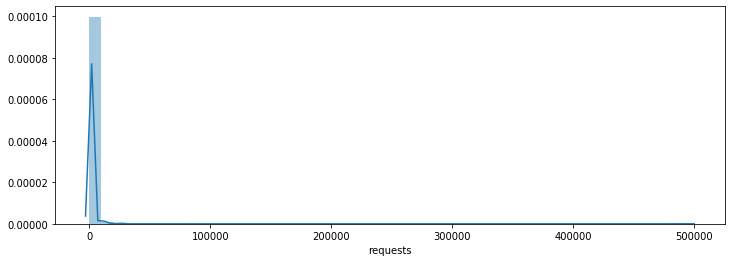

In [134]:
plot_feature(ip_df.requests)

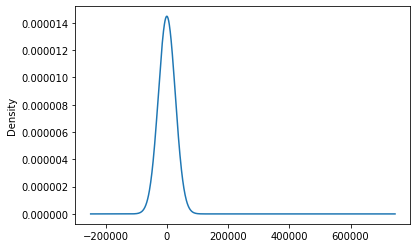

In [13]:
ip_df['requests'].plot.kde(bw_method = 3)

It can be seen that the Requests feature follows an almost symmetric distribution.

##### Feature #2: Request Interval

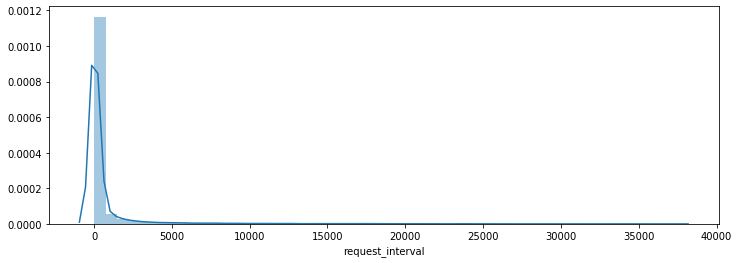

In [135]:
plot_feature(ip_df.request_interval)

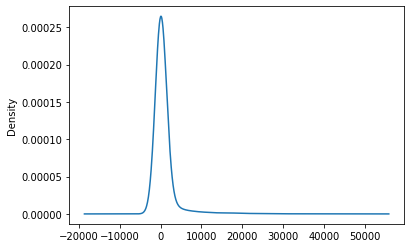

In [29]:
ip_df['request_interval'].plot.kde(bw_method = 0.5)

It can be seen that the Request Interval feature follows a slightly right-skewed distribution.

##### Feature #3: Request Popularity

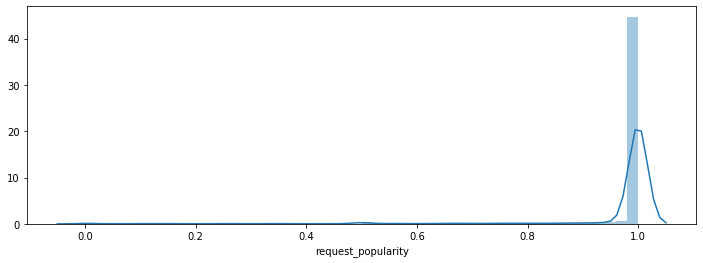

In [136]:
plot_feature(ip_df.request_popularity)

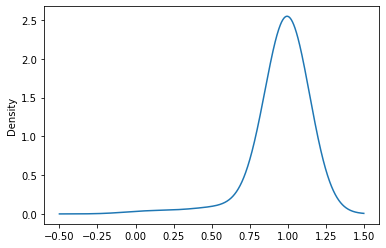

In [23]:
ip_df['request_popularity'].plot.kde(bw_method = 1)

It can be seen that the Request Popularity feature follows a left-skewed distribution.

##### Feature #4: Bytes

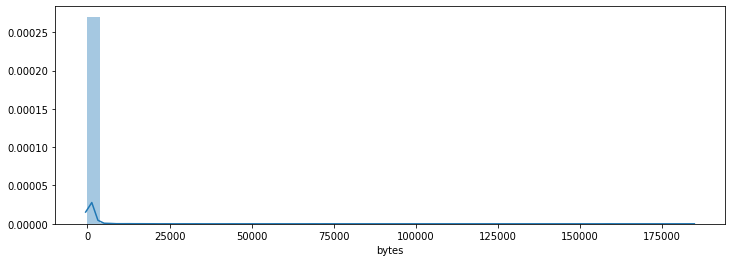

In [137]:
plot_feature(ip_df.bytes)

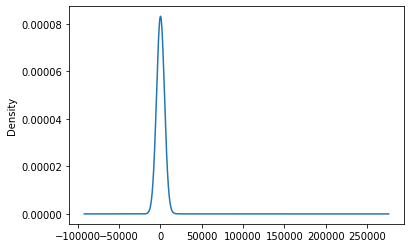

In [18]:
ip_df['bytes'].plot.kde(bw_method = 3)

It can be seen that the Bytes feature follows an almost symmetric distribution.

##### Feature #5: Delivery Time

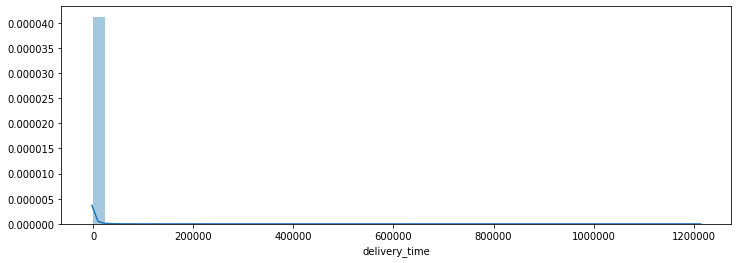

In [138]:
plot_feature(ip_df.delivery_time)

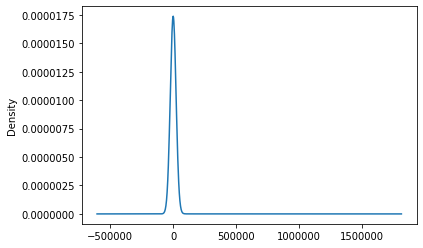

In [19]:
ip_df['delivery_time'].plot.kde(bw_method = 3)

It can be seen that the Delivery Time feature follows an almost symmetric distribution.

##### Feature #6: Hit Rate

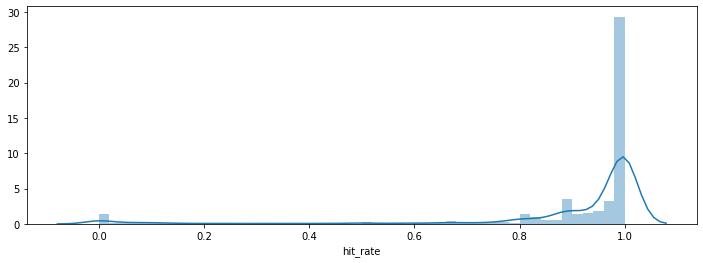

In [139]:
plot_feature(ip_df.hit_rate)

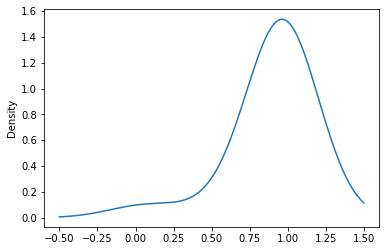

In [27]:
ip_df['hit_rate'].plot.kde(bw_method = 1)

It can be seen that the Hit Rate feature follows a left-skewed distribution.

##### Feature #7: Nodes

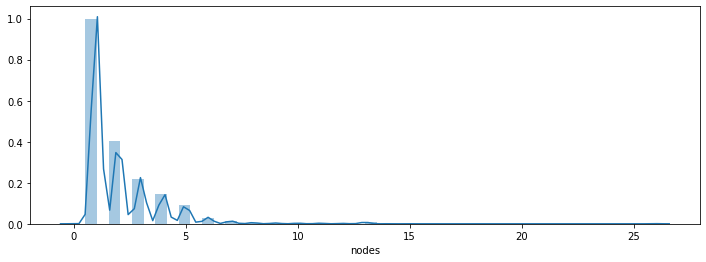

In [140]:
plot_feature(ip_df.nodes)

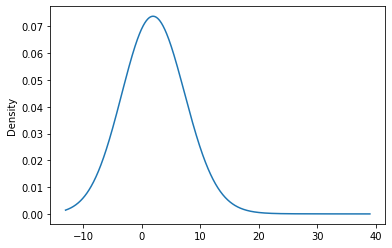

In [28]:
ip_df['nodes'].plot.kde(bw_method = 3)

It can be seen that the Nodes feature follows a right-skewed distribution. The un-normalized plot is overfitting as its based on the histogram plot.

##### Feature #8: Contents

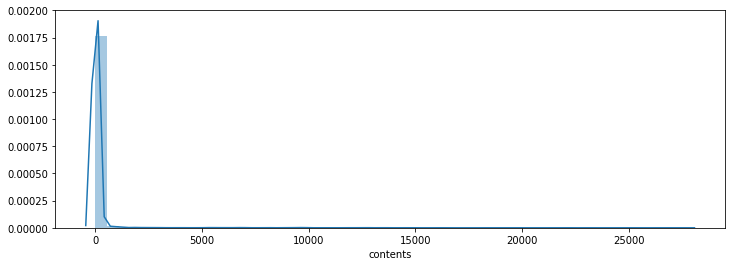

In [141]:
plot_feature(ip_df.contents)

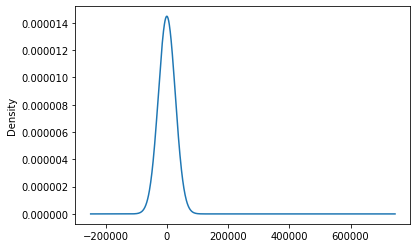

In [13]:
ip_df['contents'].plot.kde(bw_method = 3)

It can be seen that the Contents feature follows an almost symmetric distribution.

### Question 3) Find the correlation between the features. Indicate the highly correlated features and the independent features [7 points].

Pearson Correlation will be utilized to find the correlation between the features. It outputs a number between -1 and 1 that indicates the extent to which two variables are linearly related. 
- 1 indicates total positive linear correlation
- 0 indicates no linear correlation
- −1 indicates total negative linear correlation

##### Function that takes in features and plots their pearson correlations

In [142]:
def pearson_correlation(features):
    plt.figure(figsize=(12,10))
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

##### Pearson Correlation

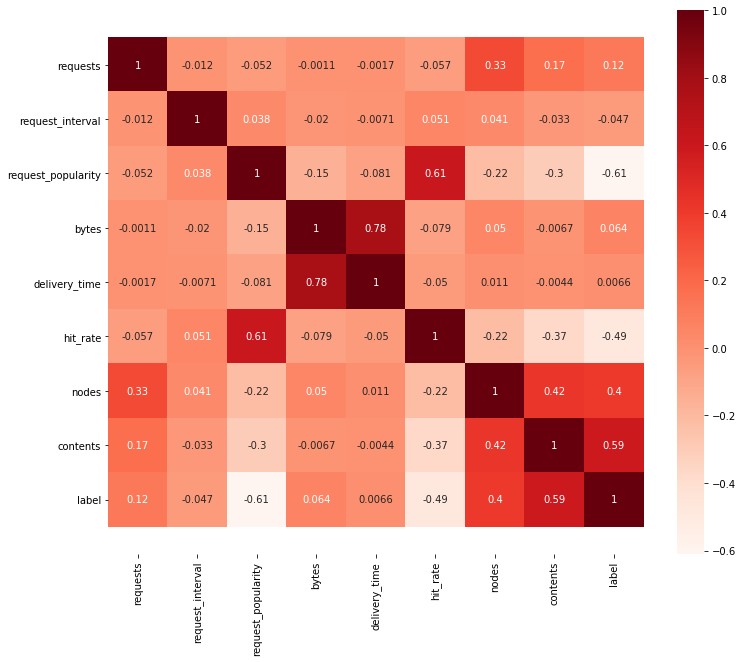

In [143]:
pearson_correlation(ip_df[['requests', 'request_interval', 'request_popularity', 'bytes', 'delivery_time', 'hit_rate', 'nodes', 
             'contents']])

Just as a note, label is a target and not a feature so it has not been included as part of the analysis for this question.

The 5 highest positively linearly correlated features:
- Bytes (feature #4) and Delivery Time (feature #5): 0.78
- Request Popularity (feature #3) and Hit Rate (feature #6): 0.61
- Nodes (feature #7) and Contents (feature #8): 0.42
- Requests (feature #1) and Nodes (feature #7): 0.33
- Requests (feature #1) and Contents (feature #8): 0.17

The 5 highest negatively linearly correlated features:
- Request Popularity (feature #3) and Label (target): -0.61
- Hit Rate (feature #6) and Contents (feature #8): -0.37
- Request Popularity (feature #3) and Contents (feature #8): -0.3
- Hit Rate (feature #6) and Nodes (feature #7): -0.22
- Request Popularity (feature #3) and Nodes (feature #7): -0.22

The 5 highest independent, non linearly, correlated features:
- Requests (feature #1) and Bytes (feature #4): -0.0011
- Requests (feature #1) and Delivery Time (feature #5): -0.0017
- Delivery Time (feature #5) and Contents (feature #8): -0.0044
- Bytes (feature #4) and Contents (feature #8): -0.0067
- Request Interval (feature #2) and Delivery Time (feature #5): -0.0071

### Question 4) Apply any significance test to rank the significance of each feature as being a distinctive feature of anomalies [7 points].

2 different significance tests will be used to ensure correct ranking of features:<br>
1. Pearson Correlation<br>
2. Ridge Regression

#### Method 1. Pearson Correlation

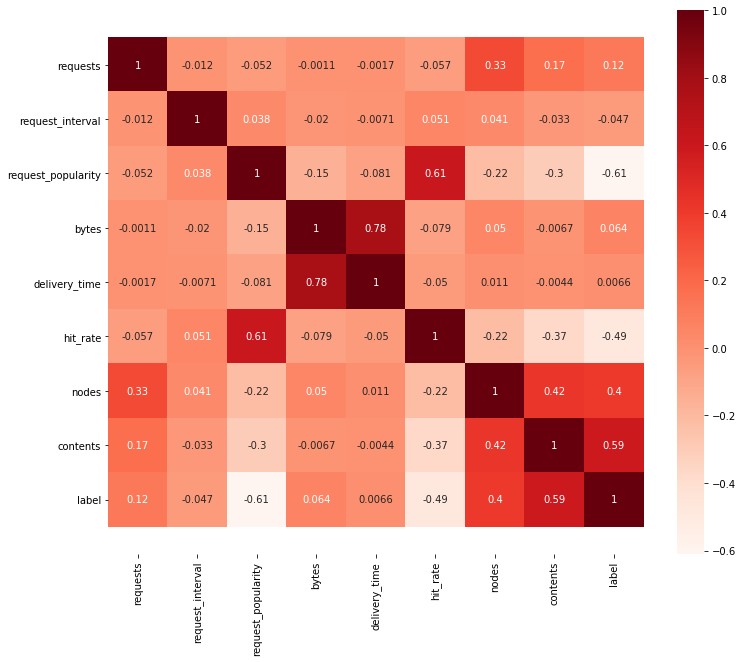

In [144]:
pearson_correlation(ip_df)

##### Correlation with output variable

In [145]:
cor = ip_df.corr()
cor_target = abs(cor["label"])
cor_target

requests              0.120987
request_interval      0.046850
request_popularity    0.610096
bytes                 0.063888
delivery_time         0.006621
hit_rate              0.487060
nodes                 0.404002
contents              0.588138
label                 1.000000
Name: label, dtype: float64

##### Plot of correlations

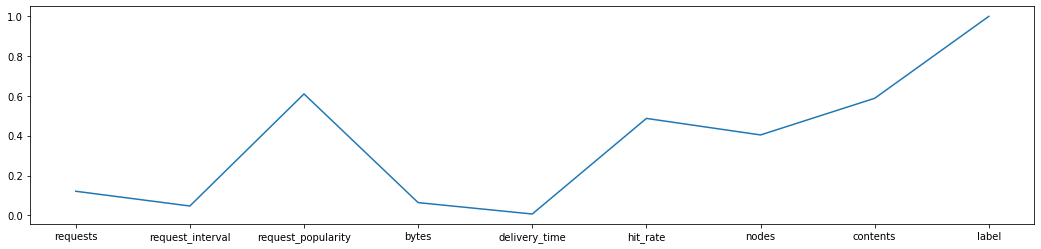

In [146]:
plt.figure(figsize=(18, 4))
plt.plot(cor_target)

Pearson: Features ranked from highest to lowest correlation/significance:
- Request Popularity
- Contents
- Hit Rate
- Nodes
- Requests
- Bytes
- Request Interval
- Delivery Time

#### Method 2. Ridge Regression

Ridge regression, also known as L2 regularization, is a regularization and an embedded feature selection technique.
<br><br>$Objective = RSS + α * $ (sum of square of coefficients) <br>$α$ is a parameter that balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

##### Function that takes in the coefficients, their names, and sort boolean value and outputs the ridge coefficients in a visually appealing manner

In [147]:
# Source: https://www.datacamp.com/community/tutorials/feature-selection-python
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "\n + ".join("%s * %s" % (round(coef, 7), name)
                                   for coef, name in lst)

##### Calculating Ridge Coefficients

In [148]:
ridge = Ridge(alpha=1.0)
X = ip_df.drop(['label'], axis =1) # Features
Y = ip_df['label'].values.ravel() # Label
ridge.fit(X,Y)
print ("Ridge model:\n", pretty_print_coefs(ridge.coef_, ['Requests', 'Request Interval', 'Request Popularity', 'Bytes', 
                                                        'Delivery Time', 'Hit Rate', 'Nodes', 'Contents'], True ))

Ridge model:
 -0.5318654 * Request Popularity
 + -0.0410595 * Hit Rate
 + 0.0146589 * Nodes
 + 5.39e-05 * Contents
 + 3.4e-06 * Bytes
 + -1.4e-06 * Request Interval
 + -1.3e-06 * Delivery Time
 + -3e-07 * Requests


Ridge: Features ranked from highest to lowest correlation/significance:
- Request Popularity
- Hit Rate
- Nodes
- Contents
- Bytes
- Request Interval
- Delivery Time
- Requests

### Question 5) Apply a suitable transformation to make better suit the Gaussian shape. Plot the normal probability plot and the pdf of each feature before and after the transformation. Also, indicate the formula that is used to transform each feature (i.e., yi = log (xi)) [10 points].

Yeo-Johnson will be used to transform the non-Gaussian data into approximetely Gaussian distribution. Unlike Box-Cox, Yeo-Johnson does not require the input data to be positive. Its formula is given by:
<br>
<br>$x_i = \frac{(x_i + 1)^\lambda-1}{\lambda}$,  if $\lambda \neq  0$, $x_i \geq 0$
<br>$x_i = log(x_i + 1)$,                  if $\lambda = 0 $, $x_i \geq 0$
<br>$x_i = \frac{-[(-x_i + 1)^{(2-\lambda)}-1]}{2-\lambda}$,  if $\lambda \neq  2$, $x_i < 0$
<br>$x_i = -log(-x_i + 1)$,                  if $\lambda = 2 $, $x_i < 0$
<br> where
<br> $i$ indicates the feature.
<br> $\lambda$ value will be chosen to maximize the log-likelihood function.

##### Function that plots the feature before Yeo-Johnson transformation

In [149]:
def plot_feature_before_yeojohnson(feature, name):
    plt.title("Before Yeo-Johnson Transformation of " + name)
    plt.hist(feature, bins = int(180/5))

##### Function that plots the feature after Yeo-Johnson transformation and outputs the Lambda value selected. Returns the transformed feature and the Lambda value

In [150]:
def yeojohnson_transformation(feature, name):
    plt.title("After Yeo-Johnson Transformation of " + name)
    transformed, lmbda_transformed = stats.yeojohnson(feature)
    plt.hist(transformed, bins = int(180/5))
    print("Lambda: ", lmbda_transformed)
    return transformed, lmbda_transformed

##### Function that plots a probplot of the feature and its transformation

Probplot generates a probability plot of the data against the quantiles of the normal distribution. It plots each data point in y using marker symbols and draws a reference line that represents the normal distribution.

In [151]:
def probplot_yeojohnson(feature, feature_transformed, name):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(feature, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title("Probplot of " + name + " against normal distribution")

    ax2 = fig.add_subplot(212)
    prob = stats.probplot(feature_transformed, dist=stats.norm, plot=ax2)
    ax2.set_title("Probplot of " + name + " after Yeo-Johnson transformation")

##### Plot Feature #1: Requests before Yeo-Johnson Transformation

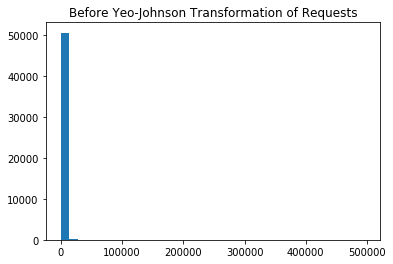

In [152]:
plot_feature_before_yeojohnson(ip_df.requests, "Requests")

##### Plot Feature #1: Requests after Yeo-Johnson Transformation

Lambda:  -0.2195967063601412


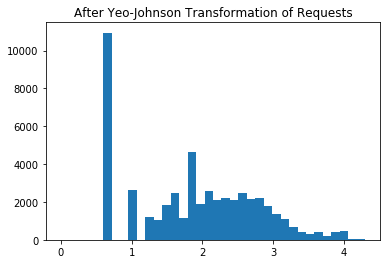

In [153]:
requests_transformed, lmbda_requests_transformed = yeojohnson_transformation(ip_df.requests, "Requests")

##### Probplot of Feature #1: Requests before and after Yeo-Johnson Transformation

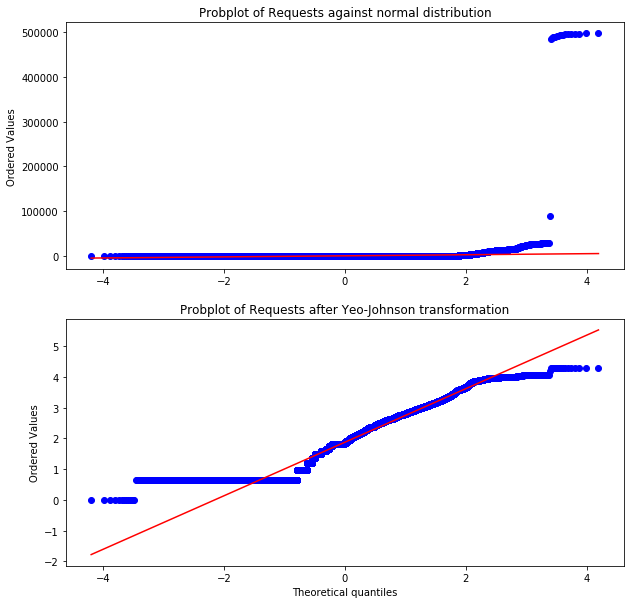

In [154]:
probplot_yeojohnson(ip_df.requests, requests_transformed, "Requests")

##### Plot Feature #2: Request Interval before Yeo-Johnson Transformation

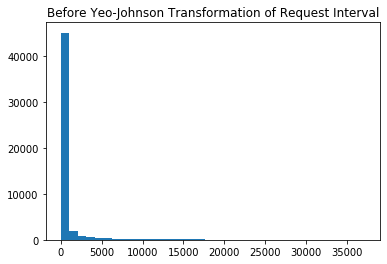

In [155]:
plot_feature_before_yeojohnson(ip_df.request_interval, "Request Interval")

##### Plot Feature #2: Request Interval after Yeo-Johnson Transformation

Lambda:  -0.24011173462171395


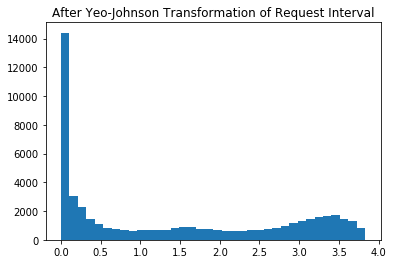

In [156]:
request_interval_transformed, lmbda_request_interval_transformed = yeojohnson_transformation(ip_df.request_interval, 
                                                                                     "Request Interval")

##### Probplot of Feature #2: Request Interval before and after Yeo-Johnson Transformation

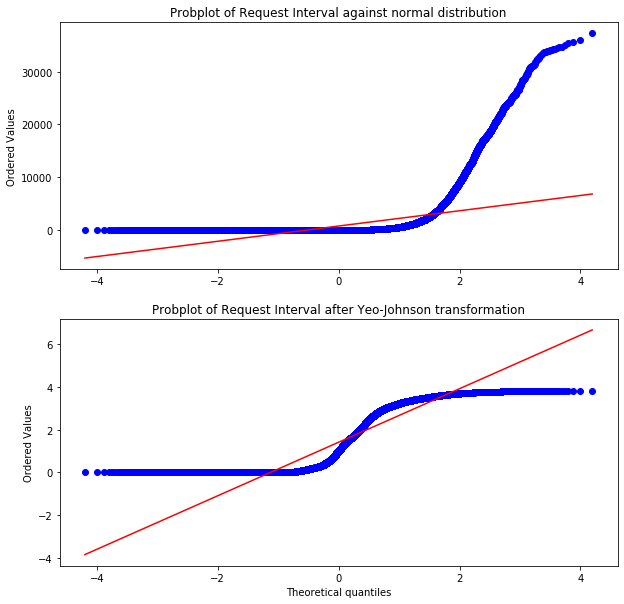

In [157]:
probplot_yeojohnson(ip_df.request_interval, request_interval_transformed, "Request Interval")

##### Plot Feature #3: Request Popularity before Yeo-Johnson Transformation

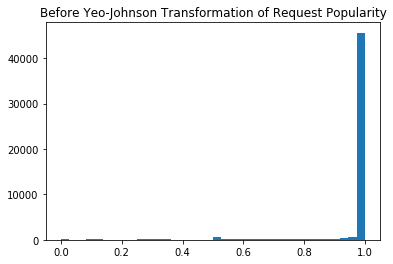

In [158]:
plot_feature_before_yeojohnson(ip_df.request_popularity, "Request Popularity")

##### Plot Feature #3: Request Popularity after Yeo-Johnson Transformation

Lambda:  39.51688089424514


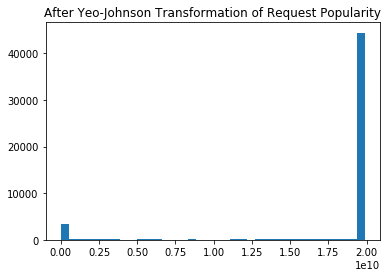

In [159]:
request_popularity_transformed, lmbda_request_popularity_transformed = yeojohnson_transformation(ip_df.request_popularity, 
                                                                                     "Request Popularity")

##### Probplot of Feature #3: Request Popularity before and after Yeo-Johnson Transformation

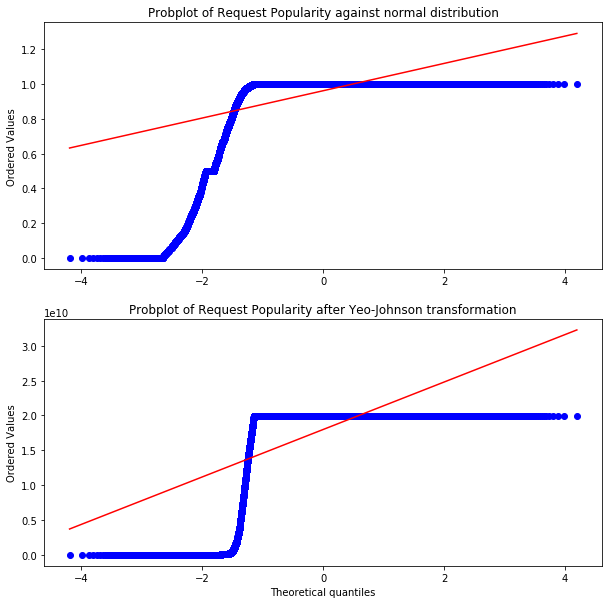

In [160]:
probplot_yeojohnson(ip_df.request_popularity, request_popularity_transformed, "Request Popularity")

##### Plot Feature #4: Bytes before Yeo-Johnson Transformation

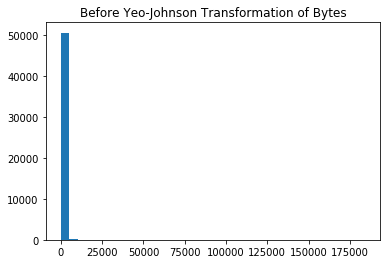

In [161]:
plot_feature_before_yeojohnson(ip_df.bytes, "Bytes")

##### Plot Feature #4: Bytes after Yeo-Johnson Transformation

Lambda:  -0.0593431243816815


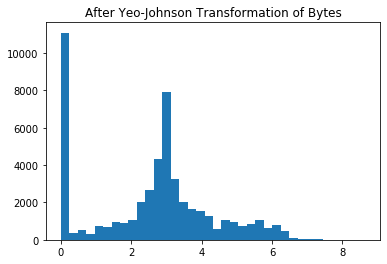

In [162]:
bytes_transformed, lmbda_bytes_transformed = yeojohnson_transformation(ip_df.bytes, "Bytes")

##### Probplot of Feature #4: Bytes before and after Yeo-Johnson Transformation

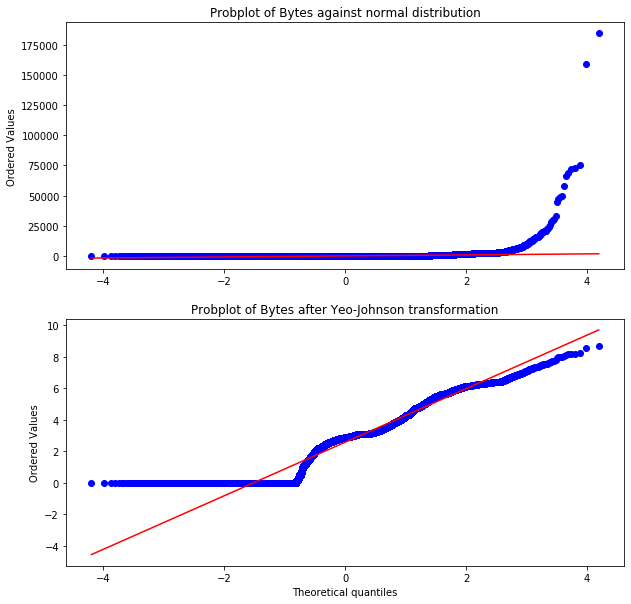

In [163]:
probplot_yeojohnson(ip_df.bytes, bytes_transformed, "Bytes")

##### Plot Feature #5: Delivery Time before Yeo-Johnson Transformation

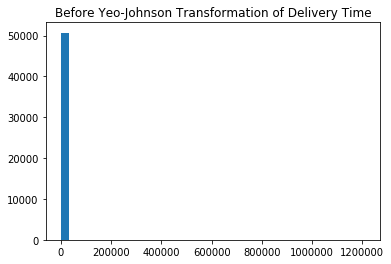

In [164]:
plot_feature_before_yeojohnson(ip_df.delivery_time, "Delivery Time")

##### Plot Feature #5: Delivery Time after Yeo-Johnson Transformation

Lambda:  -0.11368527402324874


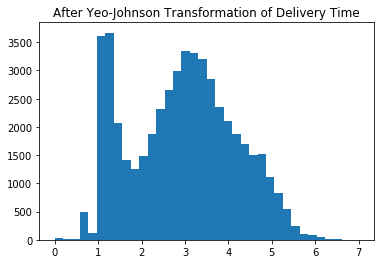

In [165]:
delivery_time_transformed, lmbda_delivery_time_transformed = yeojohnson_transformation(ip_df.delivery_time, 
                                                                                     "Delivery Time")

##### Probplot of Feature #5: Delivery Time before and after Yeo-Johnson Transformation

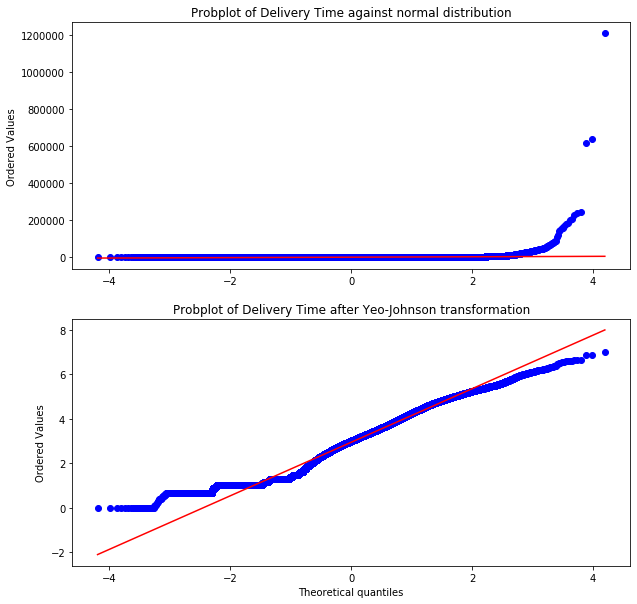

In [166]:
probplot_yeojohnson(ip_df.delivery_time, delivery_time_transformed, "Delivery Time")

##### Plot Feature #6: Hit Rate before Yeo-Johnson Transformation

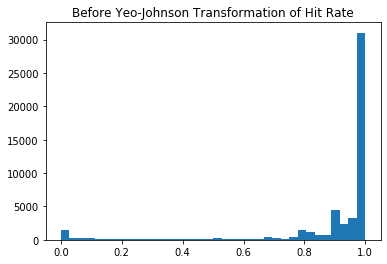

In [167]:
plot_feature_before_yeojohnson(ip_df.hit_rate, "Hit Rate")

##### Plot Feature #6: Hit Rate after Yeo-Johnson Transformation

Lambda:  11.900507144013579


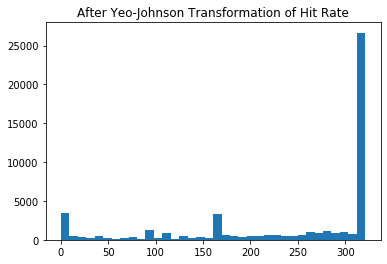

In [168]:
hit_rate_transformed, lmbda_hit_rate_transformed = yeojohnson_transformation(ip_df.hit_rate, "Hit Rate")

##### Probplot of Feature #6: Hit Rate before and after Yeo-Johnson Transformation

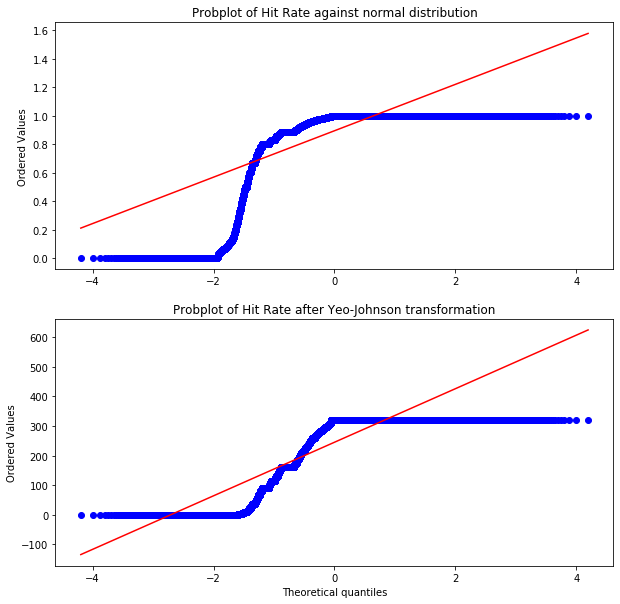

In [169]:
probplot_yeojohnson(ip_df.hit_rate, hit_rate_transformed, "Hit Rate")

##### Plot Feature #7: Nodes before Yeo-Johnson Transformation

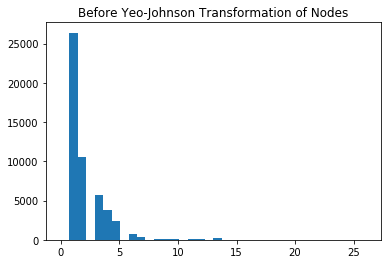

In [170]:
plot_feature_before_yeojohnson(ip_df.nodes, "Nodes")

##### Plot Feature #7: Nodes after Yeo-Johnson Transformation

Lambda:  -1.5219990533049694


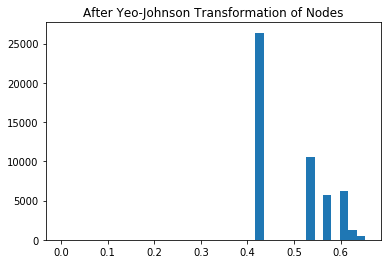

In [171]:
nodes_transformed, lmbda_nodes_transformed = yeojohnson_transformation(ip_df.nodes, "Nodes")

##### Probplot of Feature #7: Nodes before and after Yeo-Johnson Transformation

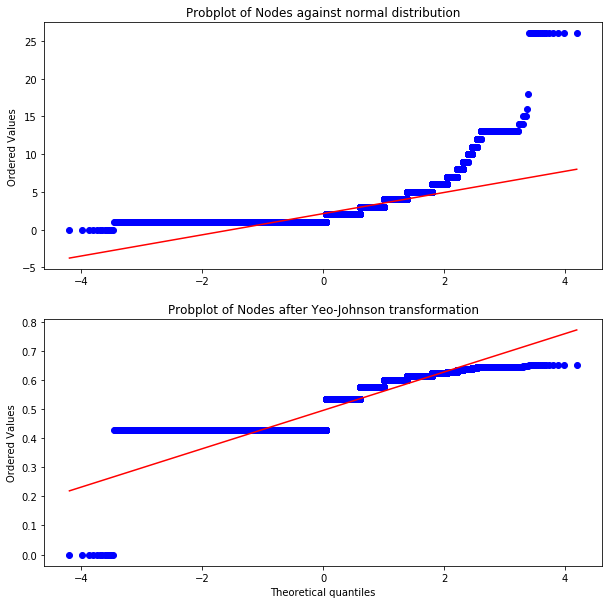

In [172]:
probplot_yeojohnson(ip_df.nodes, nodes_transformed, "Nodes")

##### Plot Feature #8: Contents before Yeo-Johnson Transformation

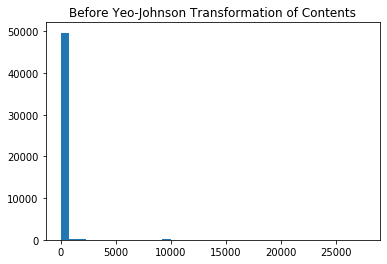

In [173]:
plot_feature_before_yeojohnson(ip_df.contents, "Contents")

##### Plot Feature #8: Contents after Yeo-Johnson Transformation

Lambda:  -0.2166005076119034


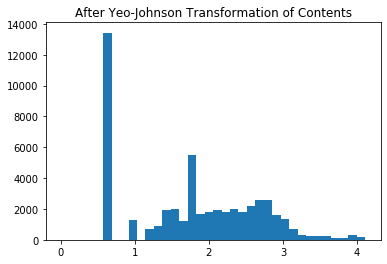

In [174]:
contents_transformed, lmbda_contents_transformed = yeojohnson_transformation(ip_df.contents, "Contents")

##### Probplot of Feature #8: Contents before and after Yeo-Johnson Transformation

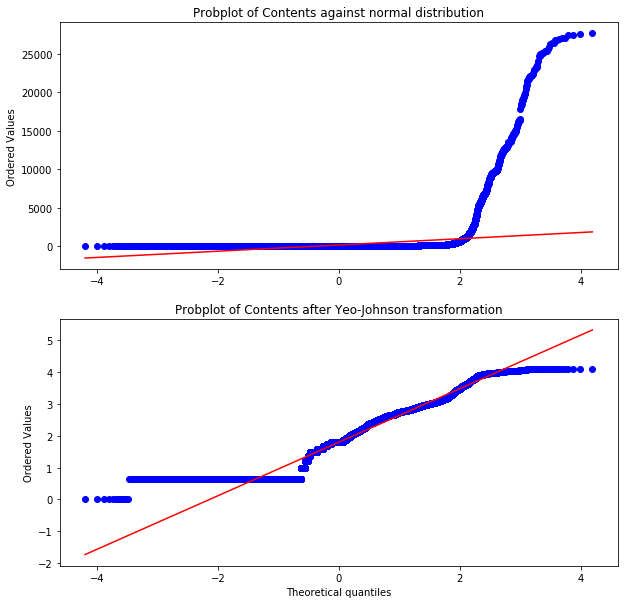

In [175]:
probplot_yeojohnson(ip_df.contents, contents_transformed, "Contents")

### Question 6) Split the data randomly into 70 training and 30 testing datasets. Make sure that the training dataset contains 70 of the total anomalies and the testing dataset contains 30 of the total anomalies. Indicate the ratio of the normal and anomaly examples for both datasets. [7 points].

`train_test_split` function from the `sklearn.model_selection` will be utilized. By setting the `stratify` parameter in the function to our target label, we can ensure that the dataset will be split into a 70:30 train:test ratio according to the label values.

##### Features and Target Split

In [176]:
features=ip_df.drop(columns=['label'],axis=1)
target=ip_df['label']

In [177]:
print(features)
print(target)

       requests  request_interval  request_popularity       bytes  \
0            27        537.329852            1.000000   14.447266   
1             5          0.031200            1.000000  126.134570   
2            60        386.569217            1.000000   17.346110   
3            42        254.592976            1.000000   18.032971   
4             2      15201.067000            1.000000   10.734375   
...         ...               ...                 ...         ...   
50751         3       1828.726667            1.000000    0.000000   
50752       143        192.876539            0.993007   15.903662   
50753        18        799.248222            1.000000   29.667209   
50754         7          1.209429            1.000000   34.100725   
50755        10         15.131600            1.000000   35.488086   

       delivery_time  hit_rate  nodes  contents  
0          17.444444  0.925926      4        18  
1          29.200000  1.000000      1         5  
2          89.450000 

##### 70:30 Train Test split with stratify set to label target

In [178]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, stratify=target)

##### Converting Train splits into Train Dataframe

In [179]:
train_df = pd.concat([X_train, y_train], axis=1, sort=False)
train_df

,requests,request_interval,request_popularity,bytes,delivery_time,hit_rate,nodes,contents,label
20777,10,3556.018700,1.0,2.004102,3.400000,1.000000,3,8,0
7092,6,2.016167,1.0,3.568359,8.500000,1.000000,2,6,0
38857,16,399.540437,1.0,18.645752,25.250000,0.875000,2,11,0
37343,21,1972.396905,1.0,16.070499,55.619048,1.000000,4,9,0
37739,1,0.000000,0.5,146.815430,3304.000000,0.000000,1,1,0
...,...,...,...,...,...,...,...,...,...
27160,83,100.545132,1.0,23.521378,29.000000,0.975904,1,72,0
15219,50,0.535620,1.0,12.814297,29.480000,0.780000,1,50,0
20949,5,0.195800,1.0,2.098242,12.000000,0.800000,1,5,0
14982,6,0.150167,1.0,43.810059,353.166667,1.000000,1,6,0


##### Converting Test splits into Test Dataframe

In [180]:
test_df = pd.concat([X_test, y_test], axis=1, sort=False)
test_df

,requests,request_interval,request_popularity,bytes,delivery_time,hit_rate,nodes,contents,label
17543,36,0.296944,1.0,123.264404,74.055556,0.972222,1,36,0
14501,7,7.080429,1.0,3.152902,5.428571,0.857143,1,6,0
3235,1,0.000000,1.0,81.747070,612.000000,1.000000,1,1,0
19702,37,785.831946,1.0,22.260557,2.513514,1.000000,1,22,0
5513,1,0.000000,1.0,81.747070,233.000000,1.000000,1,1,0
...,...,...,...,...,...,...,...,...,...
19219,1,0.000000,1.0,9.356445,60.000000,0.000000,1,1,0
30943,30,1.721900,1.0,63.460612,192.833333,1.000000,2,30,0
33151,1,0.000000,1.0,137.600586,130.000000,1.000000,1,1,0
4974,34,0.710676,1.0,11.670525,33.852941,0.970588,2,26,0


##### Ratio of normal and anomaly examples for both datasets. 0 indicates normal, while 1 indicates abnormal

In [181]:
print("Training Dataframe")
train_df['label'].value_counts(normalize=True)

Training Dataframe


0    0.966844
1    0.033156
Name: label, dtype: float64

In [182]:
print("Testing Dataframe")
test_df['label'].value_counts(normalize=True)

Testing Dataframe


0    0.966835
1    0.033165
Name: label, dtype: float64

We can see how its a 0.967:0.033 normal:anomaly ratio respectively for each dataset, exactly as the ratio of the full dataset indicated in `Question 1`.

### Question 7) - Model the features in the training dataset (all features, columns A, B, ..., H) using the multivariate Gaussian distribution. Please write down the expression of the multivariate Gaussian distribution and show the mean vector and the covariance matrix. [10 points].

![Multivariate Gaussian](figures/multivariate_gaussian2.png)
https://medium.com/@SeoJaeDuk/archived-post-multivariate-gaussian-distributions-and-entropy-3-991578ca534c
<br><br>
$\mu$ is the mean vector<br>
$\Sigma$ is the covariance matrix

First, we need to define our own functions to calculate the mean and variance of each feature, then calculate the joint Gaussian PDF.

##### Function that calculates and returns the mean and variance of the data passed

In [183]:
def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

##### Function that calculates and returns the Joint Multivariate Gaussian PDF for the data passed

In [184]:
def multivariateGaussian(X, mu, sigma2):
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     print("m = ", m, "\nn = ", n)
     
     if n == 1 or m == 1:        
         sigma2 = np.diag(sigma2[0, :])
         print("\nCovariance = ", sigma2)
     
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
     print("\nX = ", X, " \n\nDeterminant = ", det, " \n\nInverse = ", inv, " \n\nVal = ", val, 
           " \n\nProbabilities = ", p)
     
     return p

##### Function to display the mean and variance of each feature neatly

In [185]:
def mean_variance_display(mu, sigma2):
    name_list = ['Requests', 'Request Interval', 'Request Popularity', 'Bytes', 'Delivery Time', 'Hit Rate', 'Nodes', 
                 'Contents']
    for i in range(0,8):
        print(str(name_list[i]) + "\nmean: " + str(mu.item(i)) + "\nvariance: " + str(sigma2.item(i)) + "\n") 

##### Calculate mean and variance of all features in the training data set

In [186]:
X_train_numpy = X_train.to_numpy()
mu, sigma2 = estimateGaussian(X_train_numpy)

print('mean: ', mu,'\n\nvariance: ', sigma2)

mean:  [[407.52500774 726.13000515   0.96148889 207.49989398 505.28346016
    0.89414766   2.10183231 167.9228799 ]] 

variance:  [[7.79526597e+07 7.71124912e+06 2.15591838e-02 3.32668893e+06
  7.99525444e+07 5.30153968e-02 2.98273441e+00 1.65731736e+06]]


##### Display mean and variance of each feature in the training data set

In [187]:
mean_variance_display(mu, sigma2)

Requests
mean: 407.5250077401559
variance: 77952659.7353157

Request Interval
mean: 726.1300051505322
variance: 7711249.119218256

Request Popularity
mean: 0.9614888862158518
variance: 0.02155918376683761

Bytes
mean: 207.4998939758987
variance: 3326688.9304555734

Delivery Time
mean: 505.2834601648901
variance: 79952544.42335635

Hit Rate
mean: 0.8941476564531509
variance: 0.05301539678008541

Nodes
mean: 2.1018323060035464
variance: 2.982734406171836

Contents
mean: 167.922879900926
variance: 1657317.3647637405



##### Calculate Multivariate Gaussian PDF

In [188]:
#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#Gaussian PDF
p_train = multivariateGaussian(X_train_numpy, mu, sigma2)
print(p_train)

#Print Time and Memory Requirements
print ("\nMultivariate Gaussian training time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

m =  1 
n =  8

Covariance =  [[7.79526597e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.71124912e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.15591838e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.32668893e+06
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.99525444e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.30153968e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.98273441e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0

### Question 8) Develop an anomaly alarm by adjusting a threshold $\epsilon$ to your Gaussian models obtained in Questions 7, and accordingly, generate the anomaly alarm. Evaluate its performance using relative metrics (use the label column as a benchmark for the true anomalies). [10 points]. hint: use the testing dataset for performance evaluation.

Note: An anomaly window can't be generated for this data set as its not time-series. Anomalies are not occuring after each other, but at random points. Therefore, individual anomaly alarms will be generated.

##### Attach arbitrary threshold $\epsilon$ value to detect predicted anomalies in Training dataset

In [190]:
epsilon = (np.multiply(1,np.exp(-60)))
outliers = (p_train < epsilon)

##### Function that return indices of a vector

In [191]:
def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

##### Find the outliers indices of predicted anomalies in Training dataset

In [192]:
listOfOutliers = findIndices(outliers)
count_outliers = len(listOfOutliers)
print('\n\nNumber of outliers:', count_outliers)
#print('\n',listOfOutliers)



Number of outliers: 1544


##### Visualize predicted anomalies and predicted normal points from Training dataset

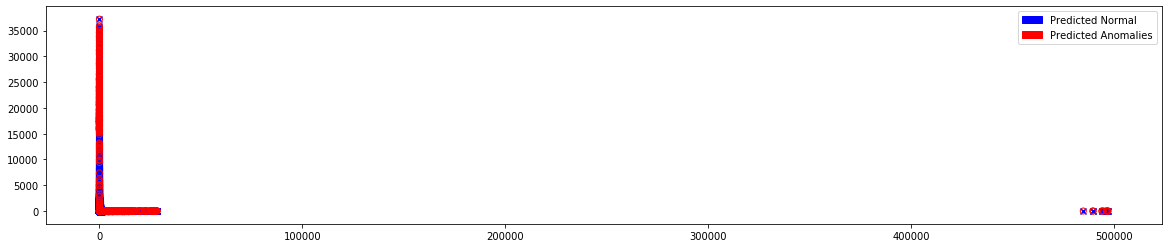

In [193]:
plt.figure(figsize=(20, 4))
plt.scatter(X_train_numpy[:,0], X_train_numpy[:, 1], color = 'blue', marker = "x")
plt.scatter(X_train_numpy[listOfOutliers,0], X_train_numpy[listOfOutliers, 1], facecolors = 'none', edgecolors = 'r')
blue_patch = mpatches.Patch(color='blue', label='Predicted Normal')
red_patch = mpatches.Patch(color='red', label='Predicted Anomalies')
plt.legend(handles=[blue_patch, red_patch])

##### Lets just use 300 points from the training dataset to get a better visualization



Number of outliers: 22


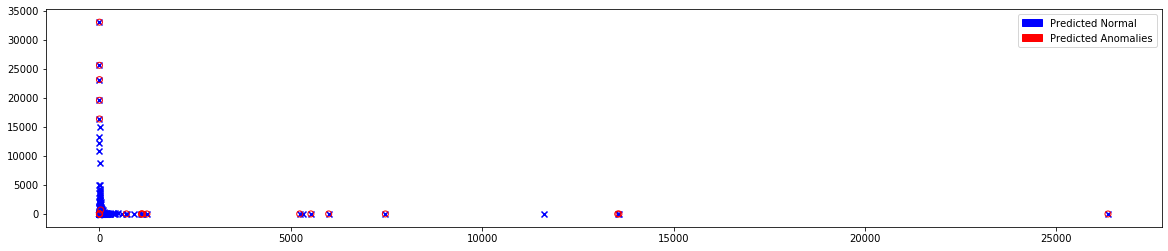

In [194]:
outliers = (p_train[0:300] < epsilon)
listOfOutliers = findIndices(outliers)
count_outliers = len(listOfOutliers)
print('\n\nNumber of outliers:', count_outliers)
plt.figure(figsize=(20, 4))
plt.scatter(X_train_numpy[0:300,0], X_train_numpy[0:300, 1], color = 'blue', marker = "x")
plt.scatter(X_train_numpy[listOfOutliers,0], X_train_numpy[listOfOutliers, 1], facecolors = 'none', edgecolors = 'r')
blue_patch = mpatches.Patch(color='blue', label='Predicted Normal')
red_patch = mpatches.Patch(color='red', label='Predicted Anomalies')
plt.legend(handles=[blue_patch, red_patch])

Lets evaluate now using the testing set. We will plug each feature from the testing set into the 'multivariateGaussian' function to get their probabilities. Note: the mean and variance of the features from the training data set will be used, therefore, we won't use the 'estimateGaussian' function.

##### Calculate Gaussian PDF for features in Testing data set

In [195]:
#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#Gaussian PDF
X_test_numpy = X_test.to_numpy()
p_test = multivariateGaussian(X_test_numpy, mu, sigma2)
print(p_test)

#Print Time and Memory Requirements
print ("\nMultivariate Gaussian testing time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

m =  1 
n =  8

Covariance =  [[7.79526597e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.71124912e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.15591838e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.32668893e+06
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.99525444e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.30153968e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.98273441e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0

##### Visualize predicted anomalies and predicted normal points from Testing dataset



Number of outliers: 632


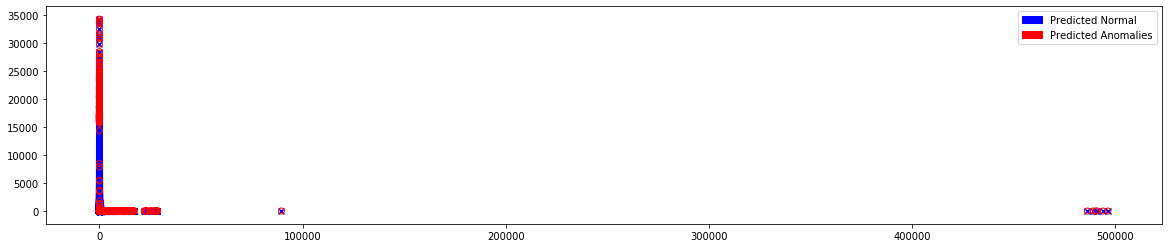

In [196]:
outliers_test = (p_test < epsilon)
listOfOutliers_test = findIndices(outliers_test)
count_outliers_test = len(listOfOutliers_test)
print('\n\nNumber of outliers:', count_outliers_test)
plt.figure(figsize=(20, 4))
plt.scatter(X_test_numpy[:,0], X_test_numpy[:, 1], color = 'blue', marker = "x")
plt.scatter(X_test_numpy[listOfOutliers_test,0], X_test_numpy[listOfOutliers_test, 1], facecolors = 'none', edgecolors = 'r')
blue_patch = mpatches.Patch(color='blue', label='Predicted Normal')
red_patch = mpatches.Patch(color='red', label='Predicted Anomalies')
plt.legend(handles=[blue_patch, red_patch])

##### Lets just use 300 points from the Testing dataset to get a better visualization



Number of outliers: 15


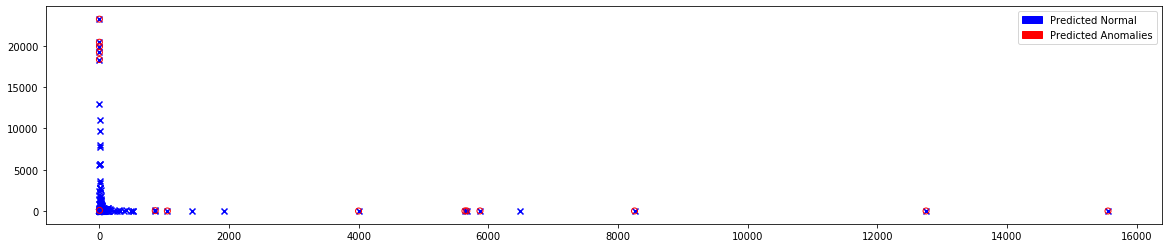

In [197]:
outliers_test = (p_test[0:300] < epsilon)
listOfOutliers_test = findIndices(outliers_test)
count_outliers_test = len(listOfOutliers_test)
print('\n\nNumber of outliers:', count_outliers_test)
plt.figure(figsize=(20, 4))
plt.scatter(X_test_numpy[0:300,0], X_test_numpy[0:300, 1], color = 'blue', marker = "x")
plt.scatter(X_test_numpy[listOfOutliers_test,0], X_test_numpy[listOfOutliers_test, 1], facecolors = 'none', edgecolors = 'r')
blue_patch = mpatches.Patch(color='blue', label='Predicted Normal')
red_patch = mpatches.Patch(color='red', label='Predicted Anomalies')
plt.legend(handles=[blue_patch, red_patch])

#### Threshold $\epsilon$ performance evaluation on Testing data set

##### Count the number of predicted anomalies in Testing data set

In [198]:
outliers_test = (p_test < epsilon)
listOfOutliers_test = findIndices(outliers_test)
count_outliers_test = len(listOfOutliers_test)
print('\n\nNumber of outliers:', count_outliers_test)



Number of outliers: 632


##### Count the number of actual anomalies in Testing data set

In [199]:
len(test_df[test_df['label'] == 1])

505

##### Numerically find matches between True Anomalies and Predicted Anomalies in Testing data set

In [277]:
#Predicted Anomalies (Arbitrary Epsilon)
#Converting np.array to 1D then converting it a pd Series
pr_an_arbit = pd.Series(outliers_test.flatten())
#Converting Boolean True and False values to 0s and 1s
pr_an_arbit = pr_an_arbit*1

#True Anomalies
#Resetting index to start from 0 rather than 1
tr_an = y_test.reset_index(drop = True)

#Comparing the elements of the series
print("Compare the elements of the True Anomalies and Predicted Anomalies (Arbitrary Epsilon):")
#Equals
print("Equals:")
equal_an_arbit = pr_an_arbit == tr_an
print(equal_an_arbit.value_counts())
#False Positive
print("\nFalse Positives: (True indicates the # of False Positive Points)")
fp_an_arbit = pr_an_arbit > tr_an
print(fp_an_arbit.value_counts())
#False Negative
print("\nFalse Negatives: (True indicates the # of False Negative Points)")
fn_an_arbit = pr_an_arbit < tr_an
print(fn_an_arbit.value_counts())

Compare the elements of the True Anomalies and Predicted Anomalies (Arbitrary Epsilon):
Equals:
True     14792
False      435
dtype: int64

False Positives: (True indicates the # of False Positive Points)
False    14946
True       281
dtype: int64

False Negatives: (True indicates the # of False Negative Points)
False    15073
True       154
dtype: int64


##### Confusion Matrix

In [201]:
pr_an_arbit_cm = confusion_matrix(tr_an, pr_an_arbit)
print(pr_an_arbit_cm)

[[14441   281]
 [  154   351]]


##### Generate Classification Report to indicate precision, recall, f1-score of predicted true anomalies & true normal + weighted accuracy total

In [202]:
pr_an_arbit_report = classification_report(tr_an, pr_an_arbit)
print(pr_an_arbit_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14722
           1       0.56      0.70      0.62       505

    accuracy                           0.97     15227
   macro avg       0.77      0.84      0.80     15227
weighted avg       0.98      0.97      0.97     15227



It can be seen that the arbitrary epsilon worked well with detecting normal points, but not the best with anomaly points in the testing data set. It achieved a precision of 0.99, recall of 0.98, f1-score of 0.99 for normal points, and a precision of 0.56, recall of 0.71, f1-score of 0.63 for anomaly points. Weighted accuracy of 0.97 was achieved.

### Question 9) Plot the generated alarm, true anomaly labels (given in label column from the dataset), and the feature of the most important feature obtained from the ranking test in Question 4 [5 points].


##### True Anomalies Figure Testing Data set

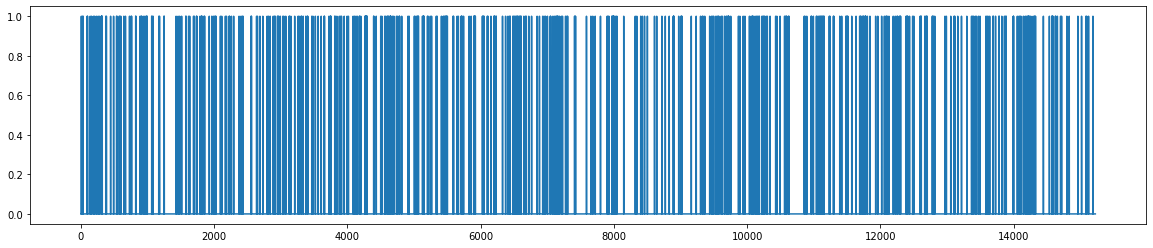

In [203]:
plt.figure(figsize=(20, 4))
plt.plot(tr_an)

##### Predicted Anomalies Figure Testing Data set

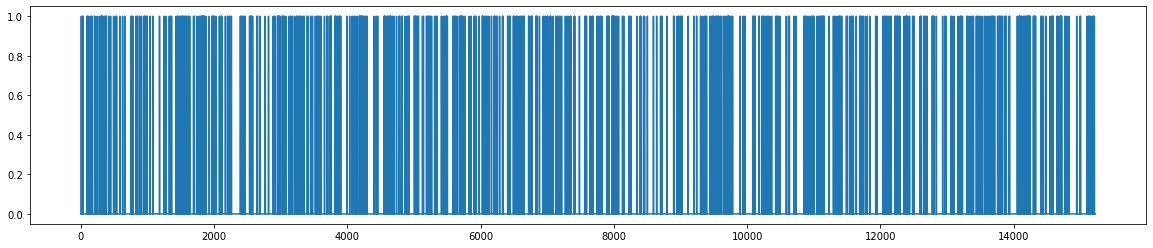

In [204]:
plt.figure(figsize=(20, 4))
plt.plot(pr_an_arbit)

##### Plot True Anomalies + Predicted Anomalies + Request Popularity (Most Significant Feature) values for Testing Data set

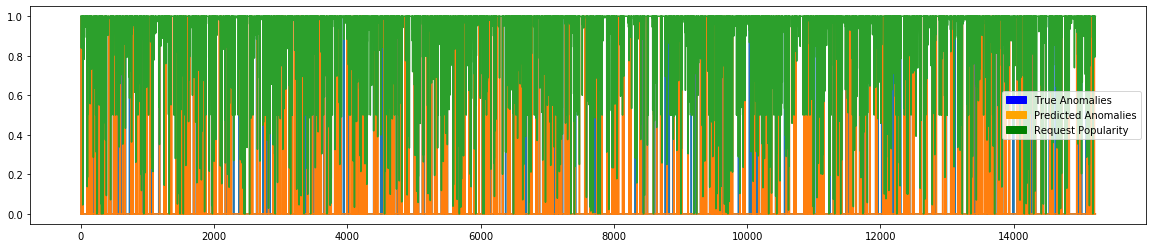

In [205]:
plt.figure(figsize=(20, 4))
plt.plot(tr_an)
plt.plot(pr_an_arbit)
x_test_index_reset = X_test.reset_index(drop = True)
plt.plot(x_test_index_reset['request_popularity'])
blue_patch = mpatches.Patch(color='blue', label='True Anomalies')
red_patch = mpatches.Patch(color='orange', label='Predicted Anomalies')
green_patch = mpatches.Patch(color='green', label='Request Popularity')
plt.legend(handles=[blue_patch, red_patch, green_patch])

We just get a unclear plot when including the entire data set. Lets select only 100 data points to see a better visual plot.

##### True Anomalies Figure Testing Data set 100 data points

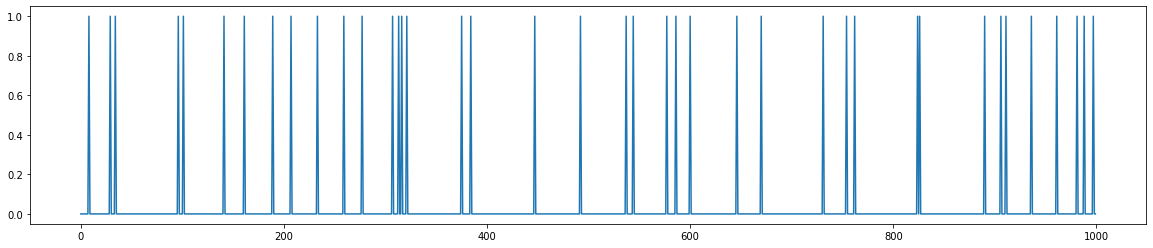

In [206]:
plt.figure(figsize=(20, 4))
plt.plot(tr_an[0:1000])

##### Predicted Anomalies Figure Testing Data set 100 data points

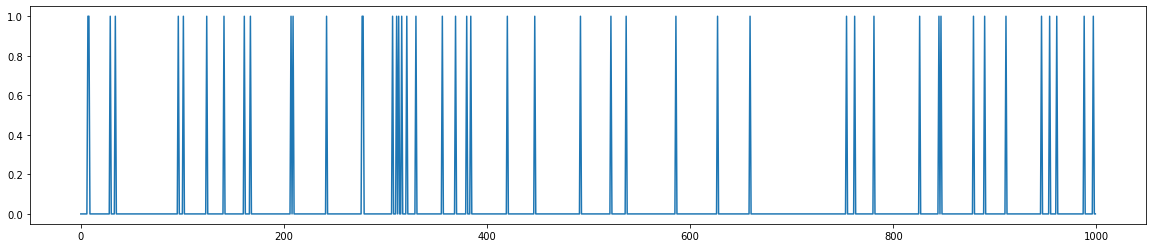

In [207]:
plt.figure(figsize=(20, 4))
plt.plot(pr_an_arbit[0:1000])

##### Plot True Anomalies + Predicted Anomalies + Request Popularity (Most Significant Feature) values for Testing Data set 100 data points

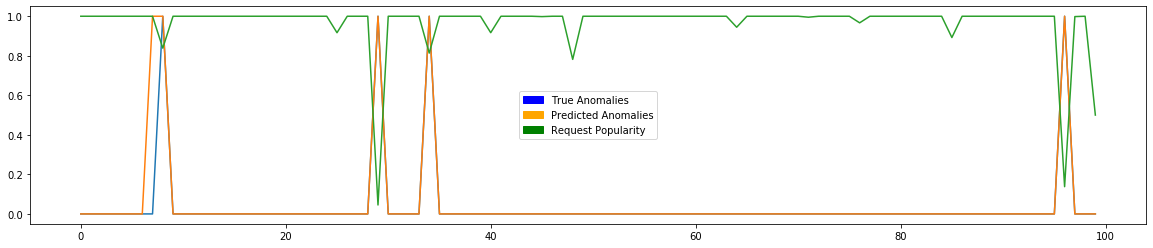

In [269]:
plt.figure(figsize=(20, 4))
plt.plot(tr_an[0:100])
plt.plot(pr_an_arbit[0:100])
x_test_index_reset = X_test.reset_index(drop = True)
plt.plot(x_test_index_reset['request_popularity'][0:100])
blue_patch = mpatches.Patch(color='blue', label='True Anomalies')
red_patch = mpatches.Patch(color='orange', label='Predicted Anomalies')
green_patch = mpatches.Patch(color='green', label='Request Popularity')
plt.legend(handles=[blue_patch, red_patch, green_patch])

We can see how two major decreases in `Request Popularity` has caused a generated alarm for the predicted anomalies. Lets even select a smaller subset to see a clearer view.

##### Plot True Anomalies + Predicted Anomalies + Request Popularity (Most Significant Feature) values for Testing Data set 50 data points

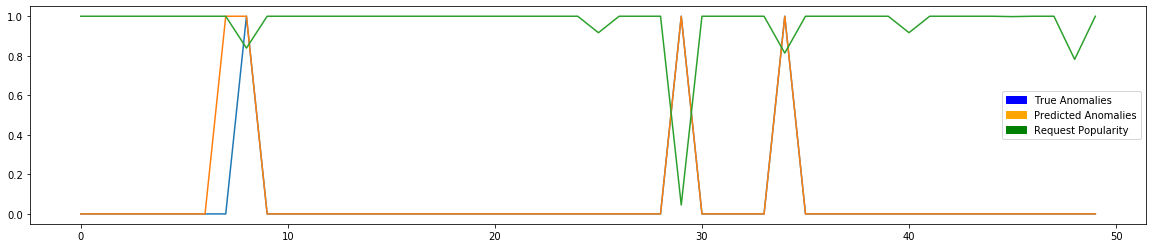

In [209]:
plt.figure(figsize=(20, 4))
plt.plot(tr_an[0:50])
plt.plot(pr_an_arbit[0:50])
x_test_index_reset = X_test.reset_index(drop = True)
plt.plot(x_test_index_reset['request_popularity'][0:50])
blue_patch = mpatches.Patch(color='blue', label='True Anomalies')
red_patch = mpatches.Patch(color='orange', label='Predicted Anomalies')
green_patch = mpatches.Patch(color='green', label='Request Popularity')
plt.legend(handles=[blue_patch, red_patch, green_patch])

We can see how the predicted anomaly alarm gets generated during 3 of the 4 major `Request Ropularity` decreases. This makes sense as the predicted anomaly alarm is built out of the features in the data set, and the request popularity feature has been calculated in `Question 4` as the most significant feature. 3 predicted anomalies alarms were generated, capturing 1 of the true anomalies in these instances of 50 data points.

### Question 10) Apply one supervised learning approach, using all features (columns A, B, ..., H), for classifying the events to normal and anomalies. Use relative performance metrics to evaluate its performance [15 points]. hint: use the training dataset for training and testing dataset for performance evaluation.

##### Normalize all features in Training Dataset then fit transform & project into the first two components using PCA

PCA is needed to reduce dimensionality, memory complexity and space complexity before feeding it to SVM, otherwise the algorithm will not run on my computer.

In [215]:
pca_all = PCA(n_components=2)
X_pca_train_normalized = StandardScaler().fit_transform(X_train)

principalComponents = pca_all.fit_transform(X_pca_train_normalized)
principalDf_train = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_train

,principal component 1,principal component 2
0,-0.288732,-0.114907
1,-0.474259,0.010316
2,-0.207559,-0.050006
3,-0.029604,-0.216876
4,3.196189,-0.298741
...,...,...
35524,-0.629815,0.107592
35525,-0.218703,0.006951
35526,-0.280041,0.021101
35527,-0.694120,0.164881


##### SVM with Linear Kernel Classification on Training Dataset

In [216]:
#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#SVM Fit
svc = svm.SVC(kernel='linear', C=1).fit(principalDf_train, y_train)

#Print Time and Memory Requirements
print (" SVM training time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

 SVM training time : 1.506 s
Current memory usage is 0.218448MB; Peak was 2.104541MB


##### Normalize all features in Testing Dataset then fit transform & project into the first two components using PCA

In [217]:
pca_all = PCA(n_components=2)
X_pca_test_normalized = StandardScaler().fit_transform(X_test)

principalComponents = pca_all.fit_transform(X_pca_test_normalized)
principalDf_test = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_test

,principal component 1,principal component 2
0,-0.623553,0.161845
1,-0.443589,0.009476
2,-0.660382,0.274224
3,-0.750890,0.073623
4,-0.696202,0.190355
...,...,...
15222,1.382997,-0.395143
15223,-0.473473,-0.003886
15224,-0.683948,0.209046
15225,-0.447647,-0.091033


##### Evaluation. Find Accuracy & Confusion Matrix of SVM Classification on Testing Dataset

In [229]:
#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#SVM Predict
y_pred_svm = svc.predict(principalDf_test)

#Print Time and Memory Requirements
print ("SVM execution time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

#Print Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(svm_cm)

#Print Classification Report
svm_report = classification_report(y_test, y_pred_svm)
print("\n")
print(svm_report)
print('\nAccuracy of SVM on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_svm)))

SVM execution time : 0.111 s
Current memory usage is 0.273371MB; Peak was 0.516754MB

Confusion Matrix:
[[14643    79]
 [  187   318]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14722
           1       0.80      0.63      0.71       505

    accuracy                           0.98     15227
   macro avg       0.89      0.81      0.85     15227
weighted avg       0.98      0.98      0.98     15227


Accuracy of SVM on test set: 0.98


#####  Is there a direct mapping to the true anomaly tags?

According to the low recall score of 0.63, there was a weak mapping to the true anomaly tags. That is because recall measures the TP over TP + FN, where having a low FN is critical for this use case of true anomaly tags. In addition, the algorithm scored a low f1-score of 0.71 and a decent precision score of 0.8 for the true anomaly tags.

### Question 11) Apply any clustering based algorithm, using all features (columns A, B, ..., H), to separate the anomaly data from the normal ones. [15 points]. hint: you can use the entire dataset for performance evaluation of the clustering algorithm.

##### Normalize all features in entire dataset then fit transform & project into the first two components using PCA

In [230]:
pca_all = PCA(n_components=2)
X_pca_all = features
X_pca_all_normalized = StandardScaler().fit_transform(X_pca_all)

principalComponents = pca_all.fit_transform(X_pca_all_normalized)
principalDf_all = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_all

,principal component 1,principal component 2
0,0.148386,-0.271670
1,-0.690485,0.170784
2,-0.691866,0.118809
3,-0.185434,-0.125456
4,-0.945002,0.063386
...,...,...
50751,-0.273274,-0.123465
50752,0.315145,-0.370475
50753,-0.470617,0.090495
50754,-0.704850,0.131205


##### Fit Data using K-NN on entire dataset (k = 2 as we only have two anomaly tag values) 

In [232]:
#K = 2
knn = KNeighborsClassifier(n_neighbors = 2)

#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#KNN Fit
knn.fit(features, target)

#Print Time and Memory Requirments
print ("K-NN training time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

K-NN training time : 0.23 s
Current memory usage is 7.588804MB; Peak was 7.599286MB


##### Evaluation. Find Accuracy & Confusion Matrix of K-NN Classifier

In [233]:
#Time and Memory Tracing
tracemalloc.start()
t0 = time()

#KNN Predict
y_pred_knn = knn.predict(features)

#Print Time and Memory Requirments + Accuracy
print ("K-NN execution time :", round(time()-t0, 3), "s")
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

#Print Confusion Matrix
knn_cm = confusion_matrix(target, y_pred_knn)
print("\nConfusion Matrix:")
print(knn_cm)

#Print Classification Report
knn_report = classification_report(target, y_pred_knn)
print("\n")
print(knn_report)
print('\nAccuracy of SVM on test set: {:.2f}'.format(metrics.accuracy_score(target, y_pred_knn)))

 K-NN execution time : 2.996 s
Current memory usage is 0.567413MB; Peak was 9.096507MB

Confusion Matrix:
[[49073     0]
 [   44  1639]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49073
           1       1.00      0.97      0.99      1683

    accuracy                           1.00     50756
   macro avg       1.00      0.99      0.99     50756
weighted avg       1.00      1.00      1.00     50756


Accuracy of SVM on test set: 1.00


#####  Is there a direct mapping to the true anomaly tags?

According to the very high recall score of 0.97, there was a strong mapping to the true anomaly tags. That is because recall measures the TP over TP + FN, where having a low FN is critical for this use case of true anomaly tags. In addition, the algorithm scored a very high f1-score of 0.99 and a very high precision score of 1.0 for the true anomaly tags.

### Question 12) Compare the Gaussian-based anomaly detection algorithm, the supervised learning approach you picked, and the clustering approach in terms of [8 points]: 
### – Detection capabilities.
### – Time complexity (in seconds) and memory requirements (in bytes) during the training phase.
### – Time complexity (in seconds) and memory requirements (in bytes) during the execution phase.

Everything was run on a laptop with 16GB DDR4 2666 MHz RAM and Intel Core i7-9750H CPU.

##### Detection Capabilities

In [238]:
print("Gaussian: ")
print(pr_an_arbit_report)
print("\nSVM: ")
print(svm_report)
print("\nKNN: ")
print(knn_report)

Gaussian: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14722
           1       0.56      0.70      0.62       505

    accuracy                           0.97     15227
   macro avg       0.77      0.84      0.80     15227
weighted avg       0.98      0.97      0.97     15227


SVM: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14722
           1       0.80      0.63      0.71       505

    accuracy                           0.98     15227
   macro avg       0.89      0.81      0.85     15227
weighted avg       0.98      0.98      0.98     15227


KNN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49073
           1       1.00      0.97      0.99      1683

    accuracy                           1.00     50756
   macro avg       1.00      0.99      0.99     50756
weighted avg       1.00      1.00      1.00     5

##### Visualize evaluation metrics

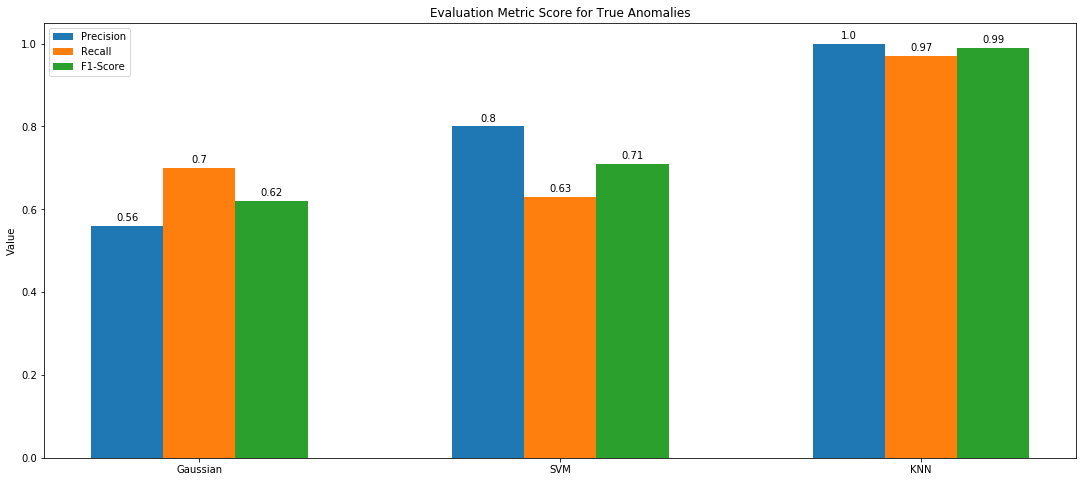

In [250]:
labels = ['Gaussian', 'SVM', 'KNN']
tr_an_precision = [0.56, 0.80, 1]
tr_an_recall = [0.70, 0.63, 0.97]
tr_an_fscore = [0.62, 0.71, 0.99]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, tr_an_precision, width, label='Precision')
rects2 = ax.bar(x , tr_an_recall, width, label='Recall')
rects3 = ax.bar(x + width, tr_an_fscore, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Evaluation Metric Score for True Anomalies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(18.5, 8, forward=True)
plt.show()

KNN has performed the best out of all, achieving a weighted average of 1 for precision, recall, accuracy, and f1-score, as well as the highest precision, recall and f1-score for the true anomaly flags.
<br><br>
SVM has performed the second best out of all, achieving a weighted average of 0.98 for precision, recall, accuracy, and f1-score, as well as the second highest precision and f1-score for the true anomaly flags.
<br><br>
Multivariate Gaussian has performed the worst out of all, achieving a weighted average of 0.98 for precision, and a weighted average of 0.97 for recall, accuracy, and f1-score, as well as the worst precision and f1-score for the true anomaly flags. It's not far off from SVM though.

##### Time complexity (in seconds) and memory requirements (in MB) during the training phase

<table style="width:100%">
  <tr>
    <th>Gaussian</th>
    <th>SVM</th> 
    <th>K-NN</th>
  </tr>
  <tr>
    <td>Time (s): 0.013</td>
    <td>Time (s): 1.506</td>
    <td>Time (s): 0.23</td>
  </tr>
  <tr>
    <td>Memory Usage (MB): 0.449241</td>
    <td>Memory Usage (MB): 0.218448</td>
    <td>Memory Usage (MB): 7.588804</td>
  </tr>
  <tr>
    <td>Peak Memory Usage (MB): 7.045404</td>
    <td>Peak Memory Usage (MB): 2.104541</td>
    <td>Peak Memory Usage (MB): 7.599286</td>
  </tr>
</table>

##### Visualize time complexity (in seconds) and memory requirements (in MB) during the training phase

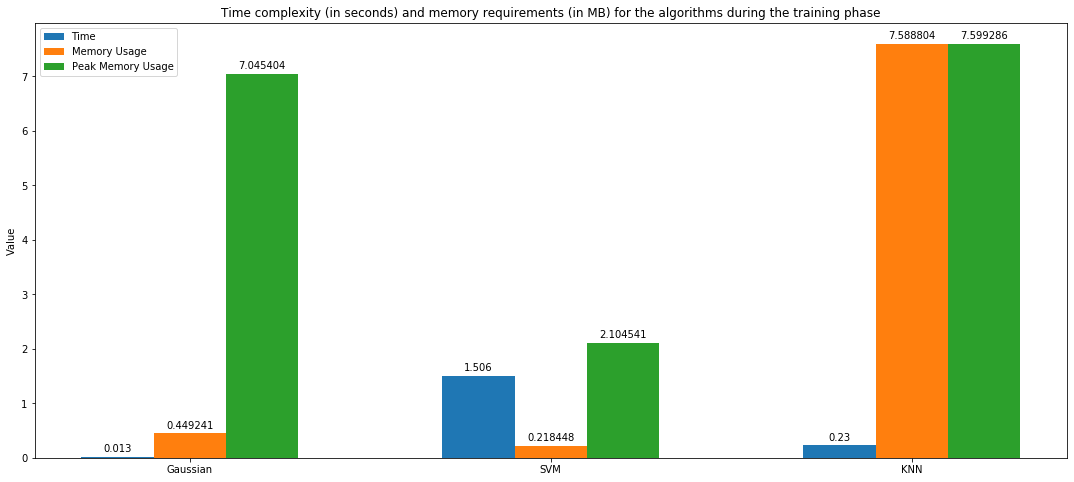

In [254]:
labels = ['Gaussian', 'SVM', 'KNN']
tr_an_time_train = [0.013, 1.506, 0.23]
tr_an_mem_train = [0.449241, 0.218448, 7.588804]
tr_an_mem_peak_train = [7.045404, 2.104541, 7.599286]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, tr_an_time_train, width, label='Time')
rects2 = ax.bar(x , tr_an_mem_train, width, label='Memory Usage')
rects3 = ax.bar(x + width, tr_an_mem_peak_train, width, label='Peak Memory Usage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title("Time complexity (in seconds) and memory requirements (in MB) for the algorithms during the training phase")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(18.5, 8, forward=True)
plt.show()

##### Time complexity (in seconds) and memory requirements (in bytes) during the execution phase

<table style="width:100%">
  <tr>
    <th>Gaussian</th>
    <th>SVM</th> 
    <th>K-NN</th>
  </tr>
  <tr>
    <td>Time (s): 0.012</td>
    <td>Time (s): 0.111</td>
    <td>Time (s): 2.996</td>
  </tr>
  <tr>
    <td>Memory Usage (MB): 1.114169</td>
    <td>Memory Usage (MB): 0.273371</td>
    <td>Memory Usage (MB): 0.567413</td>
  </tr>
  <tr>
    <td>Peak Memory Usage (MB): 4.123153</td>
    <td>Peak Memory Usage (MB): 0.516754</td>
    <td>Peak Memory Usage (MB): 9.096507</td>
  </tr>
</table>

##### Visualize time complexity (in seconds) and memory requirements (in MB) during the execution phase

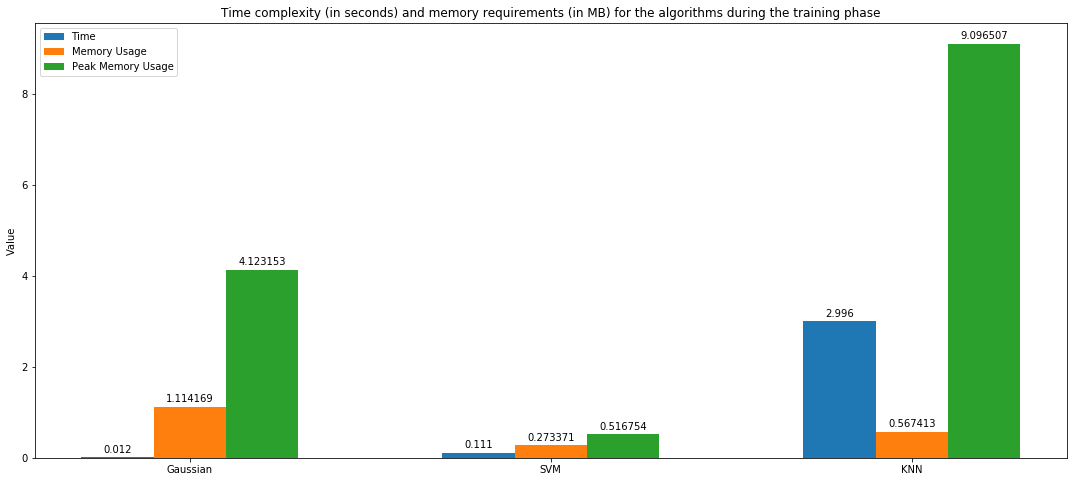

In [256]:
labels = ['Gaussian', 'SVM', 'KNN']
tr_an_time_exec = [0.012, 0.111, 2.996]
tr_an_mem_exec = [1.114169, 0.273371, 0.567413]
tr_an_mem_peak_exec = [4.123153, 0.516754, 9.096507]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, tr_an_time_exec, width, label='Time')
rects2 = ax.bar(x , tr_an_mem_exec, width, label='Memory Usage')
rects3 = ax.bar(x + width, tr_an_mem_peak_exec, width, label='Peak Memory Usage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title("Time complexity (in seconds) and memory requirements (in MB) for the algorithms during the training phase")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(18.5, 8, forward=True)
plt.show()

##### Big O notation during training

Note that:<br> m: number of data points<br> n: number of features<br> d: number of dimensions<br>k: k-nn<br> e: number of iterations

<table style="width:100%">
  <tr>
    <th>Gaussian</th>
    <th>SVM with Linear Kernel</th> 
    <th>K-NN</th>
  </tr>
  <tr>
    <td>Calculating Mean: O(m x n)</td>
    <td>O(max(m,d)  min (m,d)^2)</td>
    <td>O(k.n.m.e)</td>
  </tr>
  <tr>
    <td>Evaluating Co-variance matrix: O(m^2)</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Co-variance matrix inversion: O(n^3)</td>
    <td></td>
    <td></td>
  </tr>
    <tr>
    <td>Co-variance matrix determinant: O(n!)</td>
    <td></td>
    <td></td>
  </tr>
</table>

SVM Reference: Chapelle, Olivier. "Training a support vector machine in the primal." Neural Computation 19.5 (2007): 1155-1178.<br>
K-NN Reference: TA Anas Saci

##### Big O notation during execution

<table style="width:100%">
  <tr>
    <th>Gaussian</th>
    <th>SVM with Linear Kernel</th> 
    <th>K-NN</th>
  </tr>
  <tr>
    <td>Evaluating Probability: O(n^3)</td>
    <td>O(d)</td>
    <td>O(k.n.m)</td>
  </tr>
</table>

##### Advantages and Disadvantages of each approach:

It has to be noted though that PCA had to be applied first to SVM and KNN, which skewed their time and memory scores. Without PCA, Gaussian would have been the best and most efficient in terms of time and memory efficiency. However, since I don't have any facts or results to back that up, I will base my assumptions on the scores I got for SVM and KNN after conducting PCA, as that is all I have.
<br><br>
Gaussian:<br>
- Algorithm with the worst detection capabilities, and the second highest/lowest memory and time consumption during both training and testing phase (except for time consumption during training phase, coming in as best)<br><br>
- Advantage: Automatically captures correlation between features.
- Advantage: Time and memory efficient.
- Advntage: Easy to implement and compute.
- Disadvantage: Must have m > n or else co-variance is non-invertible.

SVM:<br>
- Algorithm with the second best detection capabilities, but the least memory and time consumption during both training and testing phase (except for time consumption during training phase, coming in as worst)<br><br>
- Advantage: It works relatively well when there is clear margin of separation between classes.
- Advantage: It is relatively memory efficient.
- Disadvantage: Not suitable for large data sets.
- Disadvantage: Does not perform very well when the data has lots of noise.

KNN:<br>
- Algorithm with the best detection capabilities, but the highest memory and time consumption during both training and testing phase.<br><br>
- Advantage: No Training Period (Lazy Learner). It stores the training dataset and learns from it only at the time of making real time predictions.
- Advantage: New data can be added seamlessly which will not impact the accuracy of the algorithm.
- Disadvantage: Does not work well with large dataset.
- Disadvantage: Does not work well with high dimensions, which is why I had to perform PCA first.

<br>SVM Reference: https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107
<br>KNN Reference: http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-knn.html

### Question 13) Optimize the parameter $\epsilon$ from Question 8 to maximize the detection rate and minimizing the false alarm rate (multi-objective optimization).[15 points]. Particularly, consider the following objectives “jointly”:
### – Objective 1: Minimize the number of generated false alarms.
### – Objective 2: Maximize the number true anomalies discovered.

##### Function to return the best epsilon value to use for selecting outliers via predictions over a validation set. 
Instead of Pareto Front, I have opted for a different technqiue. F1 score is used here to compare preditions produced with the test epsilon value instead of accuracy as the dataset is highly unbalanced. F1 score is the harmonic mean between precision and recall, where precision is sensitive to false positives and recall is sensitive to false negatives. This allows the F1 score to maximize both objectives of minimizing the number of generated false alarms (false positives) and maximizing the number of true anomalies (true positives) discovered "jointly".

In [257]:
#Credits to Andrew Ng for this function. Code from https://www.coursera.org/learn/machine-learning
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

##### Finding the optimized epsilon value for the data points selected

In [285]:
epsilon_calculated, F1_epsilon = selectThreshold(y_train, p_train)
print("Best epsilon found using cross-validation:", epsilon_calculated)
print("Best F1 on Cross Validation Set:", F1_epsilon)

C:\Users\tarek\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Best epsilon found using cross-validation: 2.1003784082108934e-23
Best F1 on Cross Validation Set: 0.4862965565706255


##### Finding the predicted anomalies from the Testing Data set using new calculated epsilon

In [286]:
outliers_calculated = (p_test < epsilon_calculated)
listOfOutliers_calculated = findIndices(outliers_calculated)
count_outliers_calculated = len(listOfOutliers_calculated)

##### Numerically find matches between True Anomalies and Predicted Anomalies (Calculated Epsilon)

In [293]:
#Predicted Anomalies (Calculated Epsilon)
#Converting np.array to 1D then converting it a pd Series
pr_an_calc = pd.Series(outliers_calculated.flatten())
#Converting Boolean True and False values to 0s and 1s
pr_an_calc = pr_an_calc*1

#True Anomalies
#Resetting index to start from 0 rather than 1
tr_an = y_test.reset_index(drop = True)

#Comparing the elements of the series
print("Compare the elements of the True Anomalies and Predicted Anomalies (Calculated Epsilon):")
#Equals
print("Equals:")
equal_an_calc = pr_an_calc == tr_an
print(equal_an_calc.value_counts())
#False Positive
print("\nFalse Positives: (True indicates the # of False Positive Points)")
fp_an_calc = pr_an_calc > tr_an
print(fp_an_calc.value_counts())
#False Negative
print("\nFalse Negatives: (True indicates the # of False Negative Points)")
fn_an_calc = pr_an_calc < tr_an
print(fn_an_calc.value_counts())

Compare the elements of the True Anomalies and Predicted Anomalies (Calculated Epsilon):
Equals:
True     14792
False      435
dtype: int64

False Positives: (True indicates the # of False Positive Points)
False    14946
True       281
dtype: int64

False Negatives: (True indicates the # of False Negative Points)
False    15073
True       154
dtype: int64


##### Confusion Matrix

In [294]:
pr_an_cm = confusion_matrix(tr_an, pr_an_calc)
print(pr_an_cm)

[[14441   281]
 [  154   351]]


##### Compare Calculated and Arbitrary Epsilon matches

In [292]:
#Equal
print("Compare the Equal elements:")
print("True Anomalies and Predicted Anomalies (Calculated Epsilon):")
print(equal_an_calc.value_counts(), "\n\nTrue Anomalies and Predicted Anomalies (Arbitrary Epsilon):\n", 
      equal_an_arbit.value_counts())

#False Positives
print("\n\nCompare the False Positive elements:")
print("True Anomalies and Predicted Anomalies (Calculated Epsilon):")
print(fp_an_calc.value_counts(), "\n\nTrue Anomalies and Predicted Anomalies (Arbitrary Epsilon):\n", 
      fp_an_arbit.value_counts())

#False Negatives
print("\n\nCompare the False Negative elements:")
print("True Anomalies and Predicted Anomalies (Calculated Epsilon):")
print(fn_an_calc.value_counts(), "\n\nTrue Anomalies and Predicted Anomalies (Arbitrary Epsilon):\n", 
      fn_an_arbit.value_counts())

Compare the Equal elements:
True Anomalies and Predicted Anomalies (Calculated Epsilon):
True     14792
False      435
dtype: int64 

True Anomalies and Predicted Anomalies (Arbitrary Epsilon):
 True     14336
False      891
dtype: int64


Compare the False Positive elements:
True Anomalies and Predicted Anomalies (Calculated Epsilon):
False    14946
True       281
dtype: int64 

True Anomalies and Predicted Anomalies (Arbitrary Epsilon):
 False    14388
True       839
dtype: int64


Compare the False Negative elements:
True Anomalies and Predicted Anomalies (Calculated Epsilon):
False    15073
True       154
dtype: int64 

True Anomalies and Predicted Anomalies (Arbitrary Epsilon):
 False    15175
True        52
dtype: int64


**Equal:** We can numerically see how the new Calculated Epsilon produced more True matches with the True Anomalies series rather than the Arbitrary Epsilon. (+3.1% Improvement)

**False Positives (The number of generated false alarms):** We can numerically see how the new Calculated Epsilon produced less True matches with the True Anomalies series rather than the Arbitrary Epsilon, meaning it produced fewer false positives and hence fewer generated false alarms. (+3.8% Improvement)

**False Negatives (The number of true anomalies discovered.):** We can numerically see how the new Calculated Epsilon produced a few more True matches with the True Anomalies series rather than the Arbitrary Epsilon, meaning it produced a bit more false negatives and hence a bit less true anomalies discovered. (-0.06% Improvement)

Overall, the calculated epsilon produced much better and accurate results than the arbitrary epsilon.